<a href="https://colab.research.google.com/github/NervOUs11/Predict_CocaCola_Stock/blob/main/Predict_KO_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# For use DataReader in pandas
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [70]:
# Import libraries
import math
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [69]:
#Get the stock quote
start = '2012-01-01'
end = '2022-06-25'
df = pdr.DataReader('KO', data_source='yahoo', start=start,end=end)
# show 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,25.261482
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,25.103008
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,24.984158
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,24.825684
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,24.825684
...,...,...,...,...,...,...
2022-06-17,60.130001,59.130001,59.700001,59.430000,34731500.0,59.430000
2022-06-21,60.880001,59.009998,59.490002,60.700001,17705000.0,60.700001
2022-06-22,61.450001,60.320000,60.599998,61.150002,15207100.0,61.150002


In [50]:
# Show price from last 7 days
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-22,58.189999,57.490002,57.709999,58.180000,12447400.0,57.323864
2021-12-23,58.610001,57.939999,58.520000,58.220001,11027300.0,57.363274
2021-12-27,58.689999,58.000000,58.000000,58.650002,9860000.0,57.786949
2021-12-28,58.939999,58.299999,58.400002,58.880001,8979900.0,58.013565
2021-12-29,59.099998,58.660000,58.950001,58.950001,9996000.0,58.082535
2021-12-30,59.230000,58.759998,59.060001,58.779999,7703900.0,57.915031
2021-12-31,59.349998,58.700001,58.750000,59.209999,10021300.0,58.338707


In [51]:
# Get the number of rows and columns in the data set
df.shape

(2517, 6)

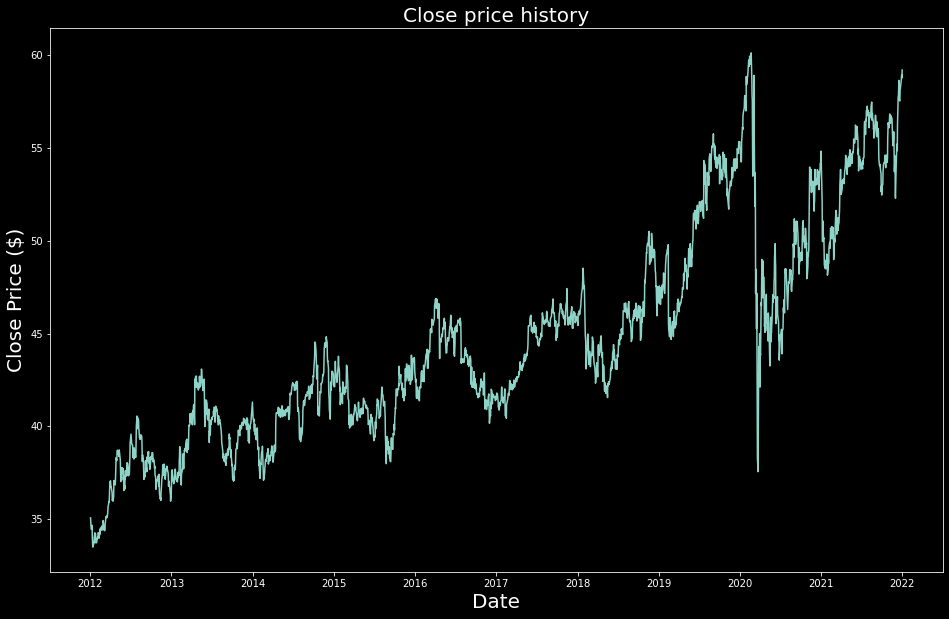

In [52]:
#Visualize the closing price
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Close price history',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.show()

In [53]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2014

In [54]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05913274],
       [0.05087289],
       [0.04467814],
       ...,
       [0.95569738],
       [0.94931473],
       [0.96545891]])

In [56]:
#Create the training date set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
 

[array([0.05913274, 0.05087289, 0.04467814, 0.03641829, 0.03641829,
       0.04411485, 0.02008635, 0.01088796, 0.        , 0.00675804,
       0.01126335, 0.00863524, 0.02064949, 0.02890934, 0.01708285,
       0.02703214, 0.01914782, 0.00844762, 0.008823  , 0.01013705,
       0.01614418, 0.0157688 , 0.02046187, 0.0195232 , 0.02928487,
       0.02515494, 0.01839691, 0.01783376, 0.02721991, 0.03585514,
       0.026469  , 0.03510423, 0.03867102, 0.03435333, 0.04242542,
       0.04111136, 0.03773234, 0.03454109, 0.03491647, 0.05387653,
       0.04899569, 0.04111136, 0.04205003, 0.03322703, 0.03379018,
       0.0428008 , 0.04730625, 0.05932051, 0.06119771, 0.06063456,
       0.06269953, 0.05950827, 0.06401358, 0.06758022, 0.07752965,
       0.08316125, 0.08447531, 0.09217202, 0.09160887, 0.106439  ])]
[0.12802701610350664]

[array([0.05913274, 0.05087289, 0.04467814, 0.03641829, 0.03641829,
       0.04411485, 0.02008635, 0.01088796, 0.        , 0.00675804,
       0.01126335, 0.00863524, 0.02

In [57]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
x_train.shape

(1954, 60)

In [59]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1954, 60, 1)

In [60]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1954/1954 [==============================] - 63s 30ms/step - loss: 0.0018
Epoch 2/5
1954/1954 [==============================] - 69s 36ms/step - loss: 6.9400e-04
Epoch 3/5
1954/1954 [==============================] - 60s 31ms/step - loss: 5.0886e-04
Epoch 4/5
1954/1954 [==============================] - 56s 29ms/step - loss: 4.6881e-04
Epoch 5/5
1954/1954 [==============================] - 55s 28ms/step - loss: 4.2491e-04


In [61]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [62]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [63]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
#Model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [75]:
#Get the root mean squared Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.2580644292812461

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


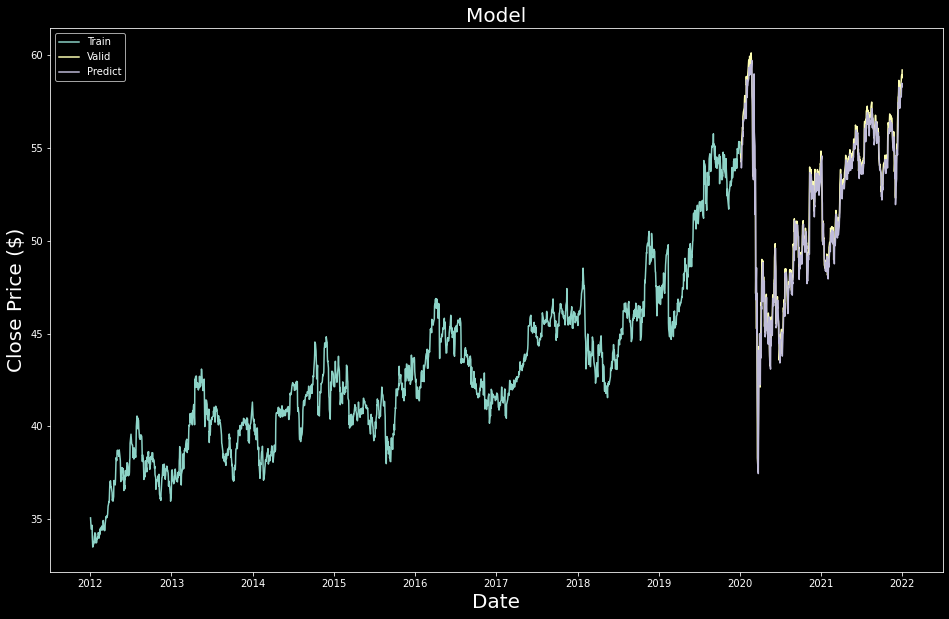

In [66]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Model',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predict'])
plt.show()

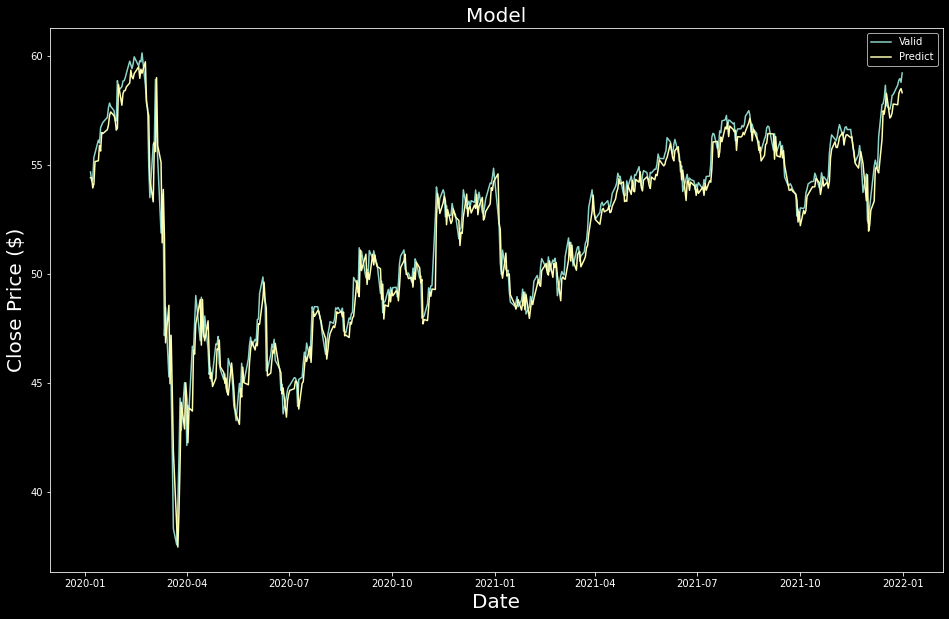

In [67]:
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Model',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Valid','Predict'])
plt.show()

In [68]:
#Show the valid and predict prices
valid

,Close,Predictions
Date,,
2020-01-06,54.669998,54.402225
2020-01-07,54.250000,54.401276
2020-01-08,54.349998,53.931870
2020-01-09,55.340000,54.118629
2020-01-10,55.529999,55.143551
...,...,...
2021-12-27,58.650002,57.751701
2021-12-28,58.880001,58.265350
2021-12-29,58.950001,58.413097


In [77]:
#Get the quote
KO_quote = pdr.DataReader('KO', data_source='yahoo', start=start,end=end)
#Create a new dataframe
new_df = KO_quote.filter(['Close'])
#Get last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price 
predicted_price = model.predict(x_test)
#Undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print("Predicted price is",predicted_price)

Predicted price is [[62.5665]]


In [82]:
KO_quote2 = pdr.DataReader('KO', data_source='yahoo', start=end,end=end)
print(KO_quote2['Close'])

Date
2022-06-24    63.040001
Name: Close, dtype: float64
